# Problem Statement: 
Peptides are proteins comprised of a relatively short chain of amino acids. The drug discovery and wellness industry look at peptides as a potential solution for health optimization and disease management while being radically cost effective and with little to no known side-effects. This makes the process of discovering such amino acid chains a valuable endeavor. There are many studies that indicate that certain peptides have anti-cancer properties - these are known as APCs. The function of these peptides is determined by their amino acid sequence. 

**Our Project will focus on using the Word2Vec algorithm to encode amino acid sequences of variable length into embeddings. This is an important step as these amino acid sequences have important positional and structural relationships which will be preserved and exploited in order to create embeddings.**

This is a supervised classification problem, where we need to categorize certain peptides as therapeutic or not. 

**As a final step, we will attempt to present the task of successful discovery as a classification problem.**

# Data description
Example data can be seen here: http://split4.pmfst.hr/dadp/?a=list

The data is a lot of "peptides", which can be thought of as a "sentence", and is composed of a sequence of "amino acids" which can be thought of as a sequence of "words". There are 20 different amino acids, which can be of varying length. 

For example, 2 pieces of data
- A P P G F T P F R I A - this is a positive sequence (it has experimentally found to have anti-bacterial properties)

- G Y A B B L Y M T N O - this is a negative sequence (experimentally, it has no effect on microbes and bacteria)

These sequences can be of varying length, so preprocessing steps will need to occur. 


###Dataset size
- We will extract roughly 2150 peptides from the DADP, or the database of anuran defense peptides, which has thousands of peptides found in the skin of frogs that have been shown to have antimicrobial properties

- Since there are very few experimentally proved non-anticancer peptides, we plan to download the dataset of all the peptides (~2500 total) from the same website (DADP), then determine which ones are not marked as positive, and use these peptides. 
  - "While it is easy to download the positive data set from the APD, it is difficult to get a true negative data set because the activities of the sequences in the negative data set have not been validated by experiments. Yet, the program is set up with good predictive ability." *-Improved Methods for Classification, Prediction and Design of Antimicrobial Peptides*

- This is based on the methodology from this study (https://www.researchgate.net/publication/258055594_In_Silico_Models_for_Designing_and_Discovering_Novel_Anticancer_Peptides)

Resources: (https://webs.iiitd.edu.in/raghava/satpdb/catalog.php), (APD, http://aps.unmc.edu/AP/main.php), (CAMP, http://www.bicnirrh.res.in/antimicrobial),(DADP, http://split4.pmfst.hr/dadp/)

Peptide discovery with deep NLP
https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-3006-z

First, the data is brought from the local machine

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving nlp_data.csv to nlp_data.csv
Saving PositiveSequences.csv to PositiveSequences.csv


In [ ]:
import io
posDF = pd.read_csv(io.BytesIO(uploaded['PositiveSequences.csv']))
allDataDF = pd.read_csv(io.BytesIO(uploaded['nlp_data.csv']))

The data in this situation is weird - one CSV contains only positive sequences (antimicrobial peptides) and the other CSV contains positive and negative sequences (antimicrobial and non-antimicrobial peptides)

In [ ]:
allDataDF = allDataDF.set_index(allDataDF['DADP ID'])
print("Dataframe with all peptides:")
display(allDataDF)
posDF = posDF.set_index(posDF['DADP ID'])
print("\n\nDataframe with only Antimicrobial peptides:")
display(posDF)

Dataframe with all peptides:


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence
DADP ID,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR
SP_P86813,SP_P86813,"[Ala1,Thr6]-bradykinyl-Ser",P86813,Physalaemus signifer,10,/,APPGFTPFRS
SP_P86814,SP_P86814,"[Ala1,Thr6]-bradykinyl-Ser,Lys",P86814,Physalaemus signifer,11,/,APPGFTPFRSK
...,...,...,...,...,...,...,...
SP_2596,SP_2596,XPF-C1,NaN,Xenopus clivii,25,/,GWASKIGQALGKVAKVGLQQFIQPK
SP_2704,SP_2704,XPF-SP1,NaN,Xenopus tropicalis,25,/,GFWSSALEGLKKFAKGGLEALTNPK
SP_2705,SP_2705,XPF-SP2,NaN,Xenopus tropicalis,25,/,GLASTIGSLLGKFAKGGAQAFLQPK




Dataframe with only Antimicrobial peptides:


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence
DADP ID,,,,,,,
SP_E1B2U0,SP_E1B2U0,Adenopleurain-A1,E1B2U0,Babina adenopleura,73,MFTLKKSLLLLFFLGIISFSLC,CFFDRIKALTKNVTLELLNTITCKLPVTPP
SP_E1B2U1,SP_E1B2U1,Adenopleurain-D1,E1B2U1,Babina adenopleura,74,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP
SP_E1B2U3,SP_E1B2U3,Adenopleurain-D2,E1B2U3,Babina adenopleura,73,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP
SP_E1B2U2,SP_E1B2U2,Adenopleurain-E1,E1B2U2,Babina adenopleura,61,MFTLKKSLLLLFFLGTINLSLC,FPESSQDLISSLLEK
SP_P31107,SP_P31107,Adenoregulin,P31107,Phyllomedusa bicolor,81,MAFLKKSLFLVLFLGLVSLSIC,GLWSKIKEVGKEAAKAAAKAAGKAALGAVSEAV
...,...,...,...,...,...,...,...
SP_G3XHP8,SP_G3XHP8,Ishikawain-5,G3XHP8,Odorrana ishikawae,69,MFTLKKSLLLLFFLGFISLSLC,SPYRCGSPDSRGSENTRCLIKK
SP_G3XHP9,SP_G3XHP9,Ishikawain-6,G3XHP9,Odorrana ishikawae,64,MFTLKKSLLLLFFLGFISLSLC,RLMKCYKPNSRGFQLCE
SP_G3XHQ0,SP_G3XHQ0,Ishikawain-7,G3XHQ0,Odorrana ishikawae,59,MFTLKKSLLLLFFLGIISLSLC,CGYRHGRLNCGRG


To construct the negative dataframe, we will find the list of all DADP IDs (unique identifiers) in the positive dataframe, and drop rows that contain these values from the "All Data" dataframe

In [ ]:
posID_List = posDF["DADP ID"].tolist()
negDF = allDataDF.drop(posID_List)
negDF

,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence
DADP ID,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR
SP_P86813,SP_P86813,"[Ala1,Thr6]-bradykinyl-Ser",P86813,Physalaemus signifer,10,/,APPGFTPFRS
SP_P86814,SP_P86814,"[Ala1,Thr6]-bradykinyl-Ser,Lys",P86814,Physalaemus signifer,11,/,APPGFTPFRSK
...,...,...,...,...,...,...,...
SP_2850,SP_2850,Wuchuanin-A1,NaN,Odorrana wuchuanensis,59,MFTLKKSLLLLFFLGTISLSLC,APDRPRKFCGILG
SP_2852,SP_2852,Wuchuanin-C1,NaN,Odorrana wuchuanensis,59,MFTLKKSMLLLFFLGTISLSLC,VFLGNIVSMGKKI
SP_2853,SP_2853,Wuchuanin-D1,NaN,Odorrana wuchuanensis,55,MFTLKKSLLLLFFLGTINLSLC,DAAVEPELYHWGKVWLPN


# Preprocessing:
The data will basically be a set of arrays of characters. These characters can  be (G, P, A, V, L, I, M, C, F, Y, W, H, K, R, Q, N, E, D, S, T, or X) where each character is representative of an amino acid. Some peptides only have a length of 6 amino acids, while others have lengths of 50. Therefore to input data into the model, the following steps need ot occur:
- truncation: sequences of amino acids will all be truncated to the same "k" length
  - some peptides will need to be truncated into multiple sequences
- padding: sequences that are too short to be truncated to this length will need to be padded on both sides by 0's
- uppercasing: in case some of the data is not uppercased (this is the convention with peptide sequences), we need to uppercase all characters

Before we pre-process data, we should ensure that the length that we truncate and pad sequences to is a good length. What length should we use? We can look at the Average length and the mode of the sequence length is to get a better idea

In [ ]:
SeqList = negDF['Bioactive sequence'].tolist() + posDF['Bioactive sequence'].tolist()
res = sum(map(len, SeqList))/float(len(SeqList))
print("The Mean length of a sequence is: ", res)

SeqList.sort(key = len)
print("The Mode length of a sequence is: ", len(SeqList[int(len(SeqList)/2)]))

The Mean length of a sequence is:  22.901205756514976
The Mode length of a sequence is:  23


The Mean length of a sequence is:  22.901205756514976
The Mode length of a sequence is:  [24]


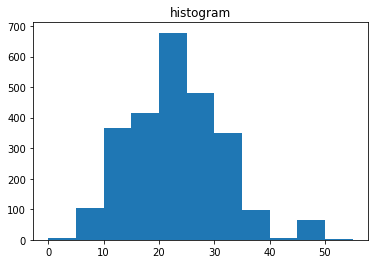

In [ ]:
import numpy as np
from matplotlib import pyplot as plt 
import scipy.stats as stats
SeqList = negDF['Bioactive sequence'].tolist() + posDF['Bioactive sequence'].tolist()

lengths = [0]*len(SeqList)
for i in range(len(SeqList)):
  lengths[i] = len(SeqList[i])

res = np.mean(np.asarray(lengths))
print("The Mean length of a sequence is: ", res)

res = stats.mode(np.asarray(lengths))
print("The Mode length of a sequence is: ", res[0])

plt.hist(lengths, bins = range(0,60,5)) 
plt.title("histogram") 
plt.show()

First, let's uppercase the amino acids, just in case

In [ ]:
negDF['Bioactive sequence'] = (negDF['Bioactive sequence'].str.upper())
print("Negative DF")
display(negDF.head(3))

posDF['Bioactive sequence'] = (posDF['Bioactive sequence'].str.upper())
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence
DADP ID,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR




Positive DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence
DADP ID,,,,,,,
SP_E1B2U0,SP_E1B2U0,Adenopleurain-A1,E1B2U0,Babina adenopleura,73,MFTLKKSLLLLFFLGIISFSLC,CFFDRIKALTKNVTLELLNTITCKLPVTPP
SP_E1B2U1,SP_E1B2U1,Adenopleurain-D1,E1B2U1,Babina adenopleura,74,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP
SP_E1B2U3,SP_E1B2U3,Adenopleurain-D2,E1B2U3,Babina adenopleura,73,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP


First, we Truncate sequences, slicing them so we only get the first 22 characters

In [ ]:
negDF['TruncSequence'] = (negDF['Bioactive sequence'].str.slice(0,22))
print("Negative DF")
display(negDF.head(3))

posDF['TruncSequence'] = (posDF['Bioactive sequence'].str.slice(0,22))
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence
DADP ID,,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA,APPGFTPFRIA
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID,APPGFTPFRID
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR,APPGFTPFR




Positive DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence
DADP ID,,,,,,,,
SP_E1B2U0,SP_E1B2U0,Adenopleurain-A1,E1B2U0,Babina adenopleura,73,MFTLKKSLLLLFFLGIISFSLC,CFFDRIKALTKNVTLELLNTITCKLPVTPP,CFFDRIKALTKNVTLELLNTIT
SP_E1B2U1,SP_E1B2U1,Adenopleurain-D1,E1B2U1,Babina adenopleura,74,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP
SP_E1B2U3,SP_E1B2U3,Adenopleurain-D2,E1B2U3,Babina adenopleura,73,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP


Next, we pad the sequences, so shorter sequences are Right padded with '#' characters. This will be the final sequence that we can use as input into the model

In [ ]:
negDF['ModSequence'] = (negDF['TruncSequence'].str.pad(22,"right","#"))
print("Negative DF")
display(negDF.head(3))

posDF['ModSequence'] = (posDF['TruncSequence'].str.pad(22,"right","#"))
print("\n\nPositive DF")
display(posDF.head(3))

Negative DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence,ModSequence
DADP ID,,,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA,APPGFTPFRIA,APPGFTPFRIA###########
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID,APPGFTPFRID,APPGFTPFRID###########
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR,APPGFTPFR,APPGFTPFR#############




Positive DF


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence,ModSequence
DADP ID,,,,,,,,,
SP_E1B2U0,SP_E1B2U0,Adenopleurain-A1,E1B2U0,Babina adenopleura,73,MFTLKKSLLLLFFLGIISFSLC,CFFDRIKALTKNVTLELLNTITCKLPVTPP,CFFDRIKALTKNVTLELLNTIT,CFFDRIKALTKNVTLELLNTIT
SP_E1B2U1,SP_E1B2U1,Adenopleurain-D1,E1B2U1,Babina adenopleura,74,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP#
SP_E1B2U3,SP_E1B2U3,Adenopleurain-D2,E1B2U3,Babina adenopleura,73,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP#


We can add a column to each dataframe that represents whether it is a positive or negative sequence

In [ ]:
negDF['Value'] = 0
print("The negative sequences, with preprocessed sequence strings and value columns appended:")
display(negDF.head(3))

posDF['Value'] = 1
print("\n\nThe positive sequences, with preprocessed sequence strings and value columns appended:")
display(posDF.head(3))

The negative sequences, with preprocessed sequence strings and value columns appended:


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence,ModSequence,Value
DADP ID,,,,,,,,,,
SP_P86816,SP_P86816,"[Ala1,Thr6,Ala11]-phyllokinin",P86816,Physalaemus signifer,11,/,APPGFTPFRIA,APPGFTPFRIA,APPGFTPFRIA###########,0
SP_P86817,SP_P86817,"[Ala1,Thr6,Asp11]-phyllokinin",P86817,Physalaemus signifer,11,/,APPGFTPFRID,APPGFTPFRID,APPGFTPFRID###########,0
SP_P86812,SP_P86812,"[Ala1,Thr6]-bradykinin",P86812,Physalaemus signifer,9,/,APPGFTPFR,APPGFTPFR,APPGFTPFR#############,0




The positive sequences, with preprocessed sequence strings and value columns appended:


,DADP ID,Entry Name,Uniprot code,Species,Sequence length,Signal sequence,Bioactive sequence,TruncSequence,ModSequence,Value
DADP ID,,,,,,,,,,
SP_E1B2U0,SP_E1B2U0,Adenopleurain-A1,E1B2U0,Babina adenopleura,73,MFTLKKSLLLLFFLGIISFSLC,CFFDRIKALTKNVTLELLNTITCKLPVTPP,CFFDRIKALTKNVTLELLNTIT,CFFDRIKALTKNVTLELLNTIT,1
SP_E1B2U1,SP_E1B2U1,Adenopleurain-D1,E1B2U1,Babina adenopleura,74,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP#,1
SP_E1B2U3,SP_E1B2U3,Adenopleurain-D2,E1B2U3,Babina adenopleura,73,MFTLKKSMILLFFLGTISLSLC,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP,APLVDIGEQYRKYLEEKQNNP#,1


Finally, we append the dataframes to each other, and we can also slice them down to just the bare bones of the data we need

In [ ]:
allDataDF = posDF.append(negDF)
inputData = allDataDF[['ModSequence', 'Value']]
inputData

,ModSequence,Value
DADP ID,,
SP_E1B2U0,CFFDRIKALTKNVTLELLNTIT,1
SP_E1B2U1,APLVDIGEQYRKYLEEKQNNP#,1
SP_E1B2U3,APLVDIGEQYRKYLEEKQNNP#,1
SP_E1B2U2,FPESSQDLISSLLEK#######,1
SP_P31107,GLWSKIKEVGKEAAKAAAKAAG,1
...,...,...
SP_2850,APDRPRKFCGILG#########,0
SP_2852,VFLGNIVSMGKKI#########,0
SP_2853,DAAVEPELYHWGKVWLPN####,0


# Feature Extraction:
Describe what feature extraction you intend to implement and why
For example, will you convert text to document-term matrix, or TF-IDF matrix, or to word (or sentence) vectors?

The characters that represent each amino acid would be converted to vectors using one hot encoding as these are individual charaters and not words in a document as the usual cases


In [ ]:
# One hot encoding of the alphabets used to represent the amino acids
import numpy
import operator
from functools import reduce
from numpy import argmax
SeqEncoded = []
for j in range(len(allDataDF)):
  data = allDataDF.ModSequence[j]
  # define universe of possible input values
  alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ#/ '
  # define a mapping of chars to integers
  char_to_int = dict((c, i) for i, c in enumerate(alphabet))
  int_to_char = dict((i, c) for i, c in enumerate(alphabet))
  # integer encode input data
  integer_encoded = [char_to_int[char] for char in data]
  #print(integer_encoded)
  # one hot encode
  onehot_encoded = list()
  for value in integer_encoded:
    letter = [0 for _ in range(len(alphabet))]
    letter[value] = 1
    onehot_encoded.append(letter)
  #print(onehot_encoded)
  SeqEncoded.append(onehot_encoded)
# End of the loop
print(len(SeqEncoded))
allDataDF['EncodedX'] = SeqEncoded

2571


In [ ]:
# Flattening the list
flatten = lambda l: [item for sublist in l for item in sublist]
for i in range(len(allDataDF)):
  allDataDF.EncodedX[i] = flatten(allDataDF.EncodedX[i])
print((allDataDF.EncodedX[3]))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

#The Model:
- Explain what model you are trying to build to attain your final goal.
- You need to convince the audience that you understand the model, its inputs, outputs and what it does. You do not need to build the model in the proposal.
- FYI: We always build models iteratively - starting with the simplest version (called baseline model) and progressing to more advanced (by adding features, tuning model parameters, combining models, etc.)


**We will be utilizing supervised machine learning and building a classification model. It would either be a simple multi-class logistic regression model or a neural networks based model. We are dividing the components of the model as below:**

**Inputs:** <br>
The inputs of the model will be a training feature matrix. Each row of this matrix represents one peptide and will be the result of the preprocessing and feature extraction steps outlined above. The size of this matrix will be (n x d). n represents the number of training examples of peptides. d is the size of the dimension of the extracted feature vector. This matrix will map to training labels of size (n,). Each peptide will map to either a 0 or 1. 

**Training:** <br>
The inputs (80% of the data) will be fed into our classification model that will learn the parameters to map the input vectors to their corresponding outputs in the optimial way. These learned parameters will be frozen and our model will be able to use these parameters to make predictions on unseen instances.

**Prediction:**<br>
Once trained, the model will be leveraged to create predictions for the test set (rest 20% of the data). The model has not seen these instances during training process. We will create these predictions and evaluate how well the model has learned based on the training data.


In [ ]:
#Splitting the dataset into train and test
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.model_selection import train_test_split as tts
tY, vY, tarr, varr = tts(allDataDF.Value, allDataDF.EncodedX, test_size=.2, random_state=00)
print(f'Train text:{len(tY)}. Test text: {len(vY)}')
print(tarr)

Train text:2056. Test text: 515
DADP ID
SP_P82039    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_A6MAT0    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_P0C5W7    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_C3RTI2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_E1B2U1    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
                                   ...                        
SP_O93224    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_P82041    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_B5L183    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_B5L1I9    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
SP_P82878    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: EncodedX, Length: 2056, dtype: object


In [ ]:
tarr.shape

(2056,)

In [ ]:
varr.shape

(515,)

In [ ]:
X_train = np.array([np.array(i) for i in tarr])
X_test = np.array([np.array(i) for i in varr])

In [ ]:
print(X_train.shape, X_test.shape)

(2056, 638) (515, 638)


In [ ]:
y_train = np.array(tY)
y_test = np.array(vY)

#Evaluation Metrics:
- Describe evaluation metrics you are planning on using. Convince the audience that you understand how these metrics are used and interpreted.


**Since the purpose of this activity is to identify as many new drugs as possible in an efficient manner. 
We will look at a validation set of peptides and identify how well our discovery process worked against them. We plan to rely on basic classification metrics namely:**

1. Accuracy score
2. Sensitivity
3. Specificity 

**The Accuracy score will give us an overall indication of model performance. Since we are dealing with drug discovery (and eventhough peptides are not to have side-effects), it would be preferable to keep incorrect classifications in check and so tracking false positives is deemed important. Therefore, we will plan to also rely on Specificity measures.**

# Interpretation of results:
In proposal you need to explain
- what you expect to see as a result (favorable or unfavorable)
- what these results mean
- how you will react to these results. that is: what will you try to modify about your process to improve final results


**From the model, we expect to see encouraging model evaluation scores. This would enable us to be confident about our drug discoveries.**

**A higher accuracy lends itself to the idea that the model is working as expected and can be relied on for the task of identifying and discovering potentially new therapeutic drugs.** 

The nature of this problem warrants a high accuracy score and that is where our post model enhancements will mostly be directed to. We would like to use more complex classification models and model ensembles to see how we can squeeze ut as muc predictability from the model as possible.
Additionally, we feel that collecting more training data to train the model could prove to be useful so that we can capture as much variance in the data and the occurence of amino acid sequences. 
Lastly, using other methodologies to extract embeddings can also be a worthwile effort in the event we can extract more predictive vectors from the GloVe model for example.

In [ ]:
# Assuming the below dataset names for now

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

In [ ]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [ ]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [ ]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [ ]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

In [ ]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [ ]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [ ]:
nn = MLPClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(nn, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
nn_fit_time = scores['fit_time'].mean()
nn_score_time = scores['score_time'].mean()
nn_accuracy = scores['test_accuracy'].mean()
nn_precision = scores['test_precision_macro'].mean()
nn_recall = scores['test_recall_macro'].mean()
nn_f1 = scores['test_f1_weighted'].mean()
nn_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes','Neural Network'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time,nn_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time,nn_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy,nn_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision,nn_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall,nn_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1,nn_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc, nn_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
5,Random Forest,0.509917,0.023511,0.953803,0.937403,0.889158,0.952251,0.969847
8,Neural Network,11.130187,0.008104,0.948453,0.916329,0.890690,0.947643,0.942984
2,Support Vector Machine,6.448885,0.125309,0.942619,0.925324,0.856690,0.940056,0.953505
0,Logistic Regression,0.145442,0.005655,0.938706,0.901502,0.867721,0.937416,0.948118
1,Decision Tree,0.102946,0.004251,0.938235,0.884681,0.893430,0.938755,0.897709
6,K-Nearest Neighbors,0.125468,0.573189,0.929964,0.883107,0.856704,0.928892,0.936661
3,Linear Discriminant Analysis,0.590818,0.005984,0.927023,0.873685,0.863124,0.927224,0.911919
4,Quadratic Discriminant Analysis,0.451070,0.021580,0.885699,0.914602,0.649384,0.856834,0.881844
7,Bayes,0.027758,0.006219,0.685266,0.649330,0.772115,0.726806,0.900212
